<a href="https://colab.research.google.com/github/DotsenkoKate/Heart_failure_prediction/blob/main/%D0%A1%D0%98%D0%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Предсказание смертности от сердечной недостаточности**

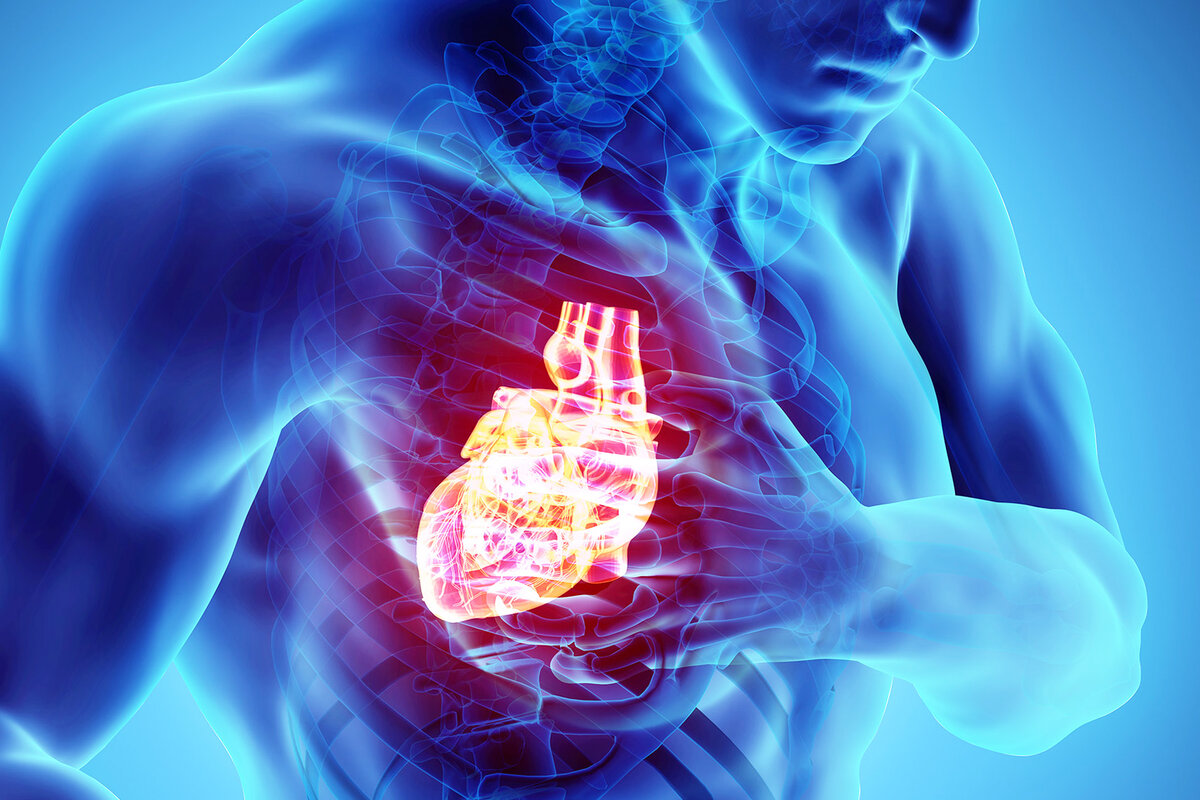

Сердечно-сосудистые заболевания являются причиной смерти номер один во всем мире, унося ежегодно около 17,9 миллиона жизней, что составляет 31% всех смертей в мире. Большинство сердечно-сосудистых заболеваний можно предотвратить, устраняя поведенческие факторы риска, такие как курение, нездоровое питание и ожирение, недостаточная физическая активность и  употребление алкоголя.

**Бизнес-постановка задачи**

Необходимо оценивать риски гибели от сердечной недостаточности, используя методы машинного обучения.
Задача оценки рисков смерти также может быть нужна для:
* выявления определенных признаков, которые могут повлиять на смерть от сердечной недостаточноти,
* оценки критических значений выявленных признаков.

**Постановка задачи анализа данных**

Целью данной задачи является построение модели классификации смертности от сердечной недостаточности: на вход модель будет принимать данные о пациенте, а на выходе она должна дать вероятность смерти пациента.

Обучать модель мы будем по данным с платформы kaggle.


# Подготовка данных

**О датасете**

Датасет состоит из набора характеристик здоровья 299 пациентов по 13 показателям. Взят с сайта kaggle.


In [1]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
heart_data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1




> ***Пояснение по названиям колонок и их значениям***
*   Age (возраст пациента (в годах))
*   Anaemia (наличие анемии) - Нет = 0, Есть = 1
*   Сreatinine_phosphokinase (уровень фермента креатинфосфокиназа в крови (в мкг/л))
*   Diabetes(наличие диабета) - Нет = 0, Есть = 1
*   Ejection_fraction(Процент крови, покидающей сердце при каждом сокращении(фракция выброса) (в процентах))
*   High_blood_pressure (наличие гипертония) - Нет = 0, Есть = 1
*   Platelets(Тромбоциты в крови (килотромбоциты/мл))
*   Serum_creatinine (Уровень сывороточного креатинина в крови (мг/дл))
*   Serum_sodium(Уровень сывороточного натрия в крови (мг-экв/л))
*   Sex (пол пациента) - Мужчина = 1, Женщина =0
*   Smoking (курение) - Нет = 0, Да = 1
*   Time (Период наблюдения (в днях))
*   DEATH_EVENT(Пациент умер в течение периода наблюдения) - Нет = 0, Да =1   











**Проверка целостности данных**



In [3]:
heart_data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [4]:
heart_data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

> Нет нулевых строк и нет потерянных данных



**Категориальные признаки**

Далее, чтобы определить категориальные признаки, взглянем на количество уникальных значений в каждом столбце. Признаки «Sex», «Anaemia», «Diabets», «High_blood_pressure», «Smoking» и «DEATH_EVENT» имели два возможных значения, а остальные имели большее количество возможных значения.

In [5]:
heart_data.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

# Анализ данных

**Загрузка необходимых библиотек**

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


> Для данной задачи выделим целевую функцию - Смертность(DEATH_EVENT), а остальные 12 переменных будут использоваться для прогноза целевой переменной.





In [7]:
heart_data.groupby("DEATH_EVENT").count()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,203,203,203,203,203,203,203,203,203,203,203,203
1,96,96,96,96,96,96,96,96,96,96,96,96


In [8]:
heart_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


> По имеющимся данным из 299 пациентов 96 погибли и 203 остались живы. Можем сделать вывод, что наш набор данных несбалансирован, потому что у нас общее количество смертей (96) составляет менее половины от общего числа людей, которые не умерли из-за сердечной недостаточности (203).

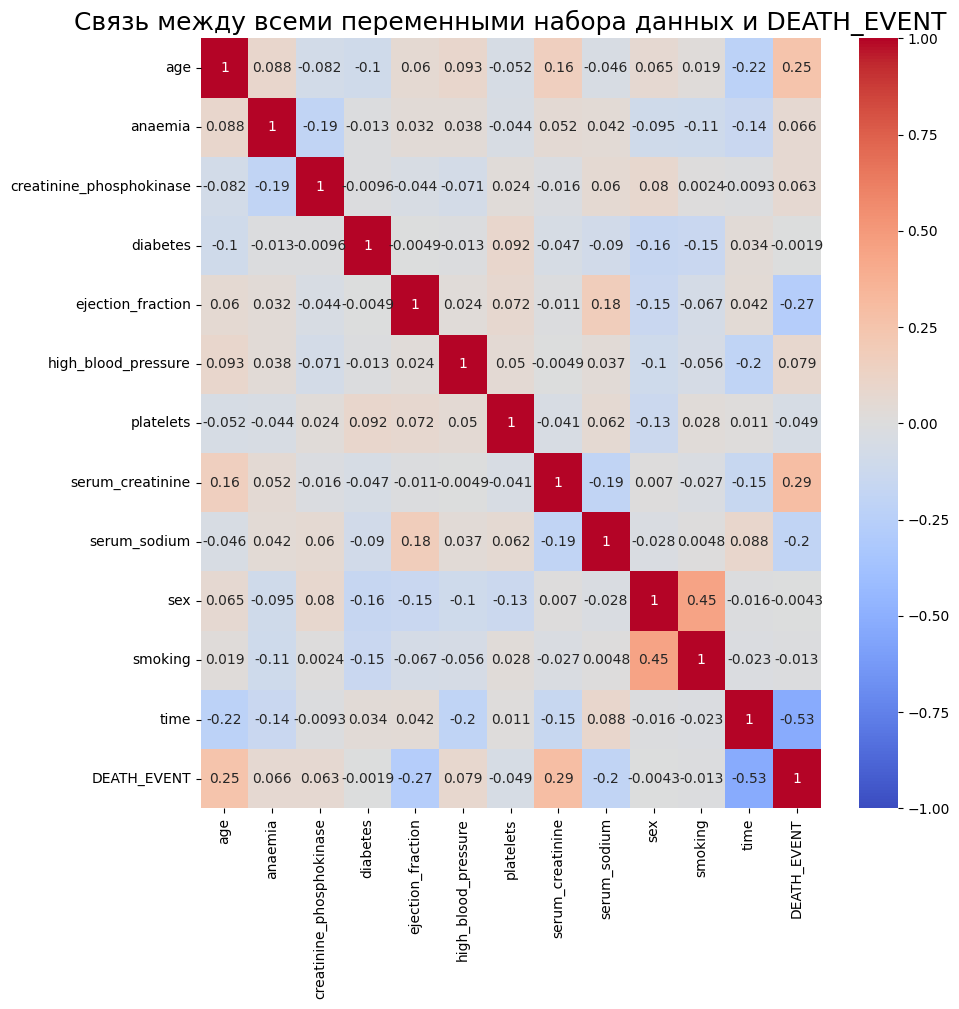

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(heart_data.corr(), vmin=-1, cmap='coolwarm', annot=True);
plt.title("Связь между всеми переменными набора данных и DEATH_EVENT", fontsize = 18)
plt.show()

> Мы замечаем, что существует положительная корреляция между DEATH_EVENT  и уровнем креатинина в сыворотке крови(serum creatinine) и возрастом(age). У нас также есть отрицательная корреляция между DEATH_EVENT и временем(time), фракцией выброса(ejection fraction), а также количеством натрия в сыворотке(serum sodium).



In [10]:
fig = px.box(heart_data,  y='serum_creatinine', points="all")
fig.update_layout(
    title_text="Распределение по serum creatinine")
fig.show()

Удалим выбросы до значения больше 5

In [11]:
heart_data = heart_data.loc[heart_data['serum_creatinine'] < 5]

In [12]:
fig = px.box(heart_data,  y='age', points="all")
fig.update_layout(
    title_text="Распределение по возрасту")
fig.show()

In [13]:
fig = px.box(heart_data,  y='ejection_fraction', points="all")
fig.update_layout(
    title_text="Распределение по ejection fraction")
fig.show()

Удалим выбросы до значения больше 70

In [14]:
heart_data = heart_data.loc[heart_data['ejection_fraction'] < 70]

In [15]:
fig = px.box(heart_data,  y='serum_sodium', points="all")
fig.update_layout(
    title_text="Распределение по serum sodium")
fig.show()

Удалим выбросы до значения меньше 120

In [16]:
heart_data = heart_data.loc[heart_data['serum_sodium'] > 120]

In [17]:
fig = px.box(heart_data,  y='time', points="all")
fig.update_layout(
    title_text="Распределение по времени")
fig.show()

In [18]:
heart_data.groupby("DEATH_EVENT").count()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,199,199,199,199,199,199,199,199,199,199,199,199
1,91,91,91,91,91,91,91,91,91,91,91,91


Всего осталось 290 записей

 *Посмотрим каждые признаки*

In [19]:
categorical_data = ["anaemia","diabetes","high_blood_pressure","sex","smoking"]
continuous_data = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]

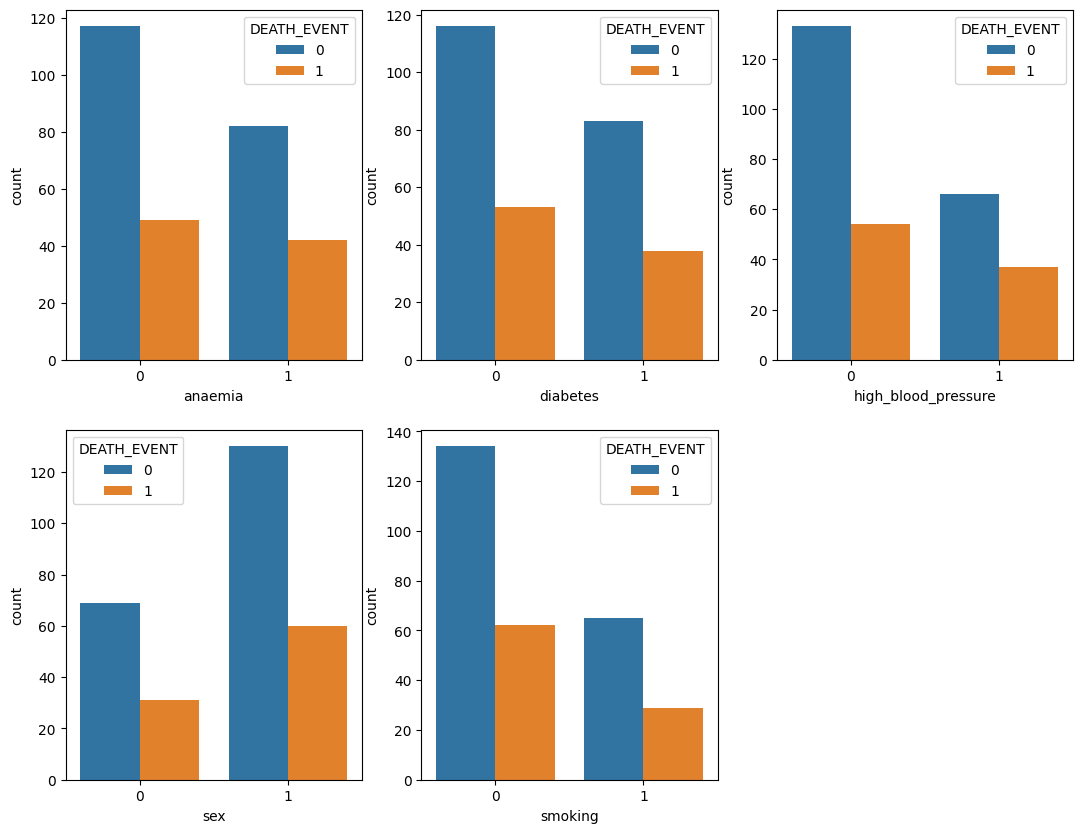

In [20]:
plt.figure(figsize=(13,10))
for i,cat in enumerate(categorical_data):
    plt.subplot(2,3,i+1)
    sns.countplot(data = heart_data, x= cat, hue = "DEATH_EVENT")
plt.show()

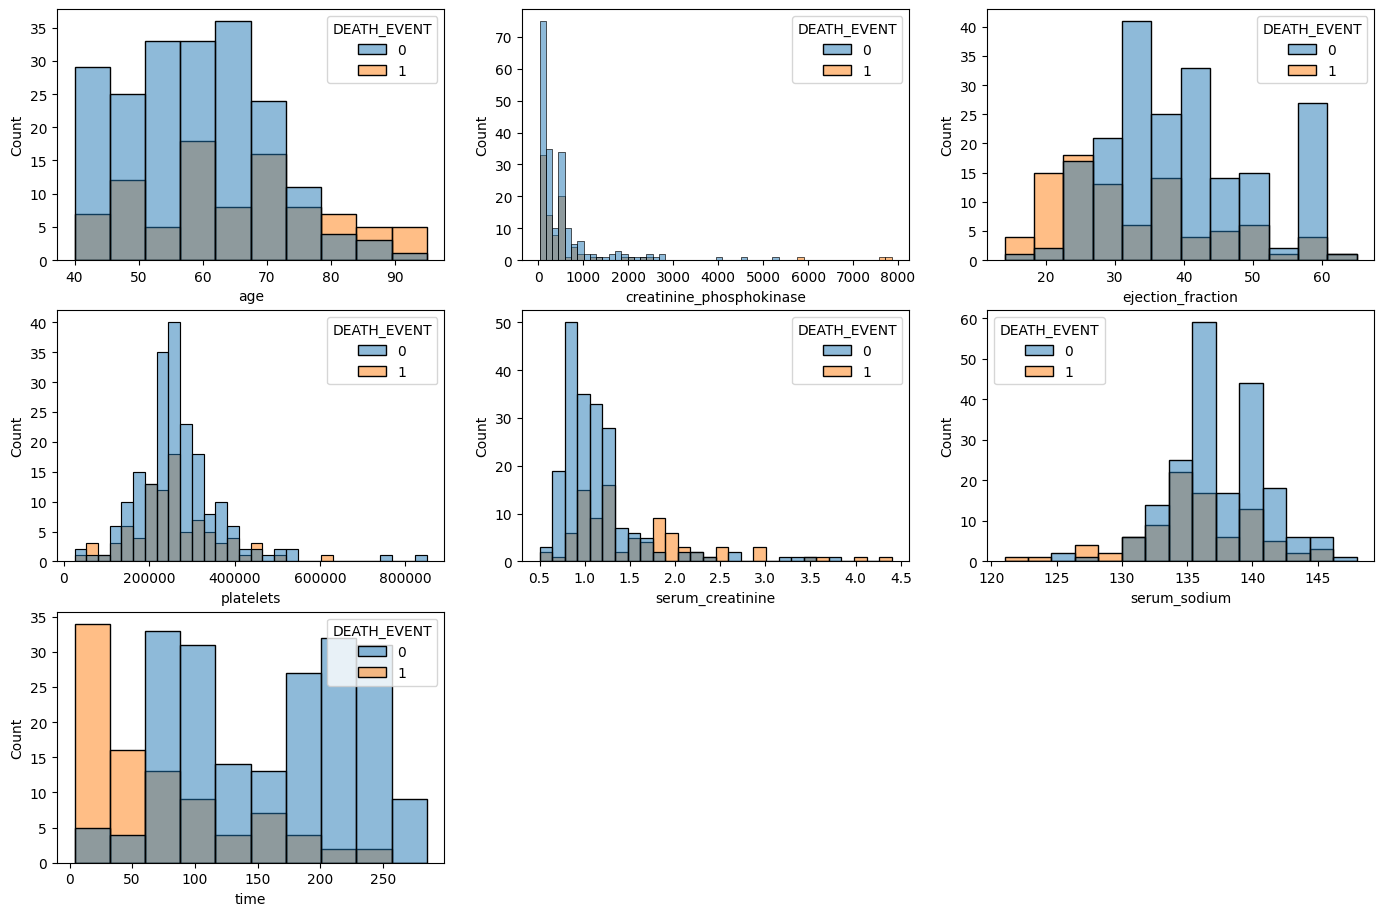

In [21]:
plt.figure(figsize=(17,15))
for j,con in enumerate(continuous_data):
    plt.subplot(4,3,j+1)
    sns.histplot(data = heart_data, x= con, hue = "DEATH_EVENT")
plt.show()

# Обучение моделей

In [22]:
x = heart_data[["age","ejection_fraction","serum_creatinine","serum_sodium","time"]]
y = heart_data["DEATH_EVENT"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [23]:
# Data scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_auc_score, accuracy_score, roc_curve

In [25]:

def plot_roc_curve(model, X_train, X_test, y_train, y_test):
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]

    plt.figure(figsize=(12,10))

    print(f'Train roc-auc: {roc_auc_score(y_train, y_train_proba)}')
    print(f'Test roc-auc: {roc_auc_score(y_test, y_test_proba)}')


    plt.plot(*roc_curve(y_train, y_train_proba)[:2], label='train roc-curve')
    plt.plot(*roc_curve(y_test, y_test_proba)[:2], label='test roc-curve')

    plt.plot([0,1], [0,1], linestyle='--', color='black')
    plt.grid(True)
    plt.legend()
    plt.show()

**Логистическая регрессия**

Train roc-auc: 0.9008714596949892
Test roc-auc: 0.8797554347826086


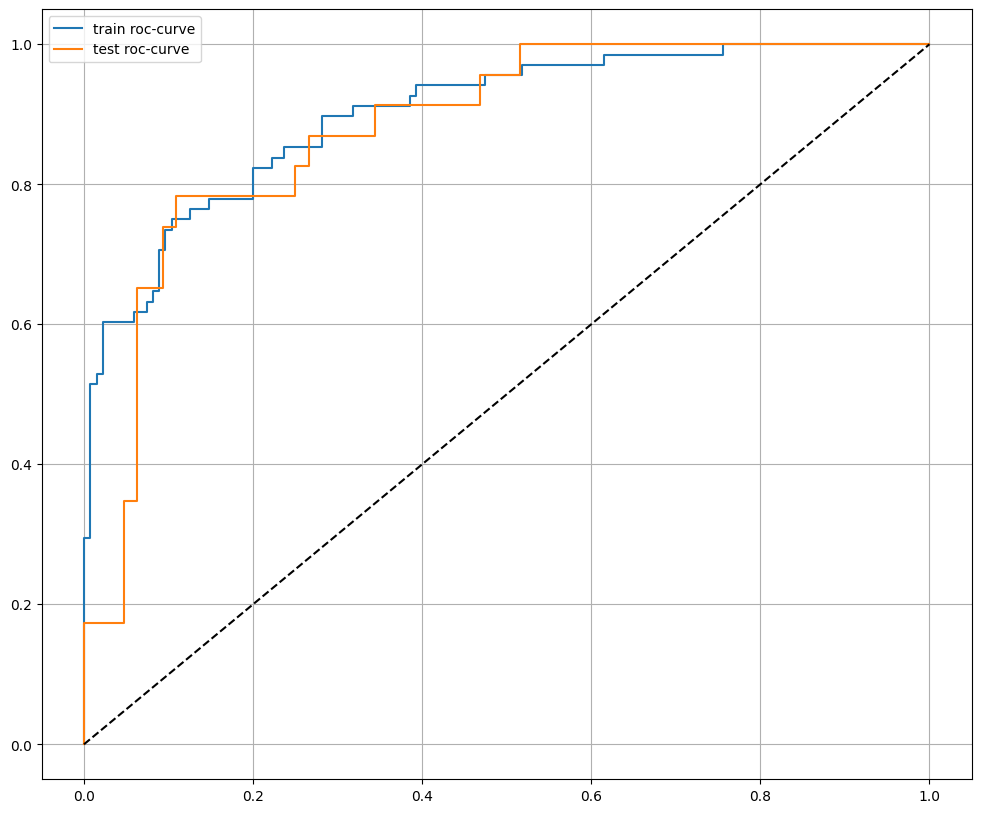

In [26]:
lr_model = LogisticRegression()
lr_model.fit(x_train_scaled, y_train)
lr_prediction = lr_model.predict_proba(x_test_scaled)[:, 1]

auc_lr = roc_auc_score(y_test, lr_prediction)
mse_lr = mean_squared_error(y_test, lr_prediction)
rmse_lr = np.sqrt(mean_squared_error(y_test,lr_prediction))
mae_lr = mean_absolute_error(y_test,lr_prediction)
r2_lr = r2_score(y_test,lr_prediction)
acc_lr= accuracy_score(y_test,(lr_model.predict(x_test_scaled)))
plot_roc_curve(lr_model, x_train_scaled, x_test_scaled, y_train, y_test)


**Naive Bayes**

Train roc-auc: 0.892483660130719
Test roc-auc: 0.8899456521739131


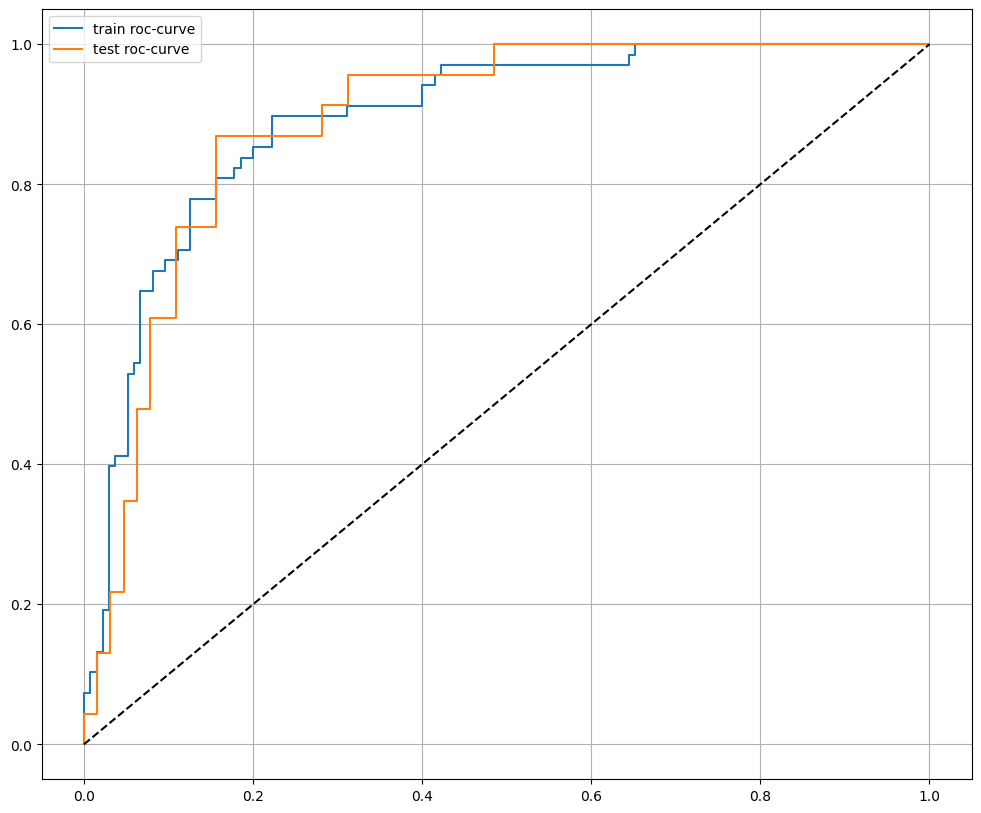

In [27]:
nb_model = GaussianNB()
nb_model.fit(x_train_scaled, y_train)
nb_prediction = nb_model.predict_proba(x_test_scaled)[:, 1]

auc_nb = roc_auc_score(y_test, nb_prediction)
mse_nb = mean_squared_error(y_test, nb_prediction)
rmse_nb = np.sqrt(mean_squared_error(y_test,nb_prediction ))
mae_nb = mean_absolute_error(y_test,nb_prediction )
r2_nb = r2_score(y_test,nb_prediction )
acc_nb = accuracy_score(y_test,(nb_model.predict(x_test_scaled)))
plot_roc_curve(nb_model, x_train_scaled, x_test_scaled, y_train, y_test)

**Random Forest Classifier**

Train roc-auc: 1.0
Test roc-auc: 0.9008152173913044


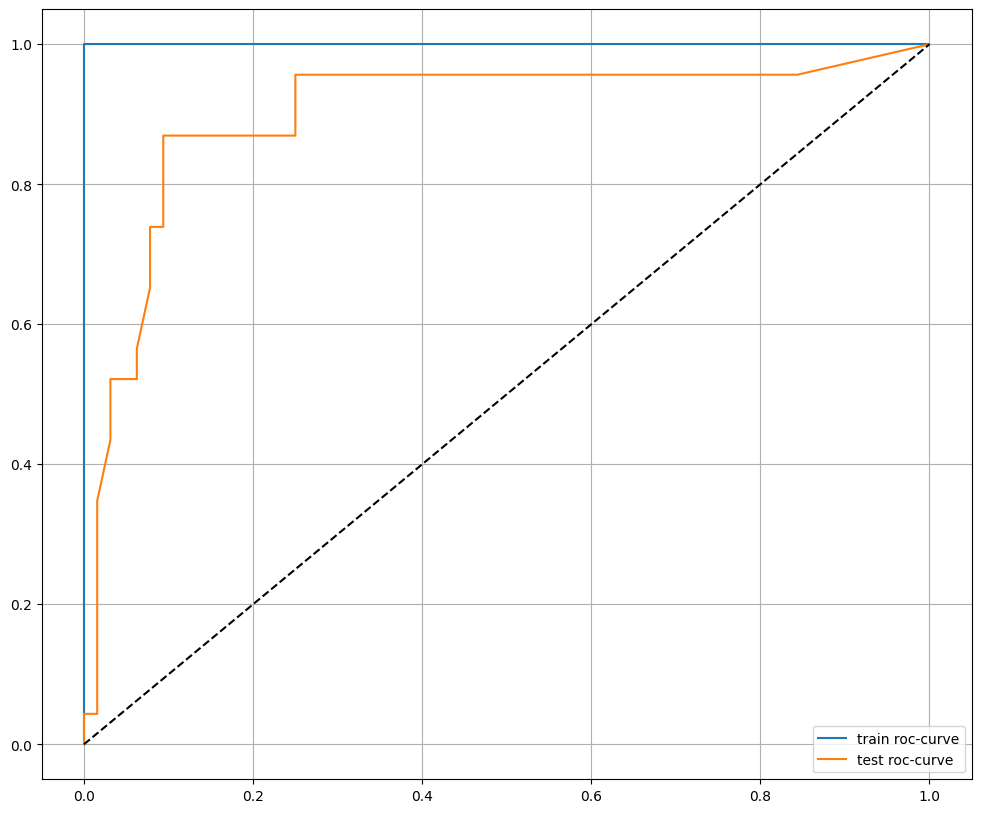

In [28]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train_scaled, y_train)
rf_prediction = rf_model.predict_proba(x_test_scaled)[:, 1]

auc_rf = roc_auc_score(y_test, rf_prediction)
mse_rf = mean_squared_error(y_test, rf_prediction)
rmse_rf = np.sqrt(mean_squared_error(y_test,rf_prediction ))
mae_rf = mean_absolute_error(y_test,rf_prediction )
r2_rf = r2_score(y_test,rf_prediction )
acc_rf = accuracy_score(y_test,(rf_model.predict(x_test_scaled)))
plot_roc_curve(rf_model, x_train_scaled, x_test_scaled, y_train, y_test)

 **KNearestNeighbor**

Train roc-auc: 0.9384531590413944
Test roc-auc: 0.8722826086956521


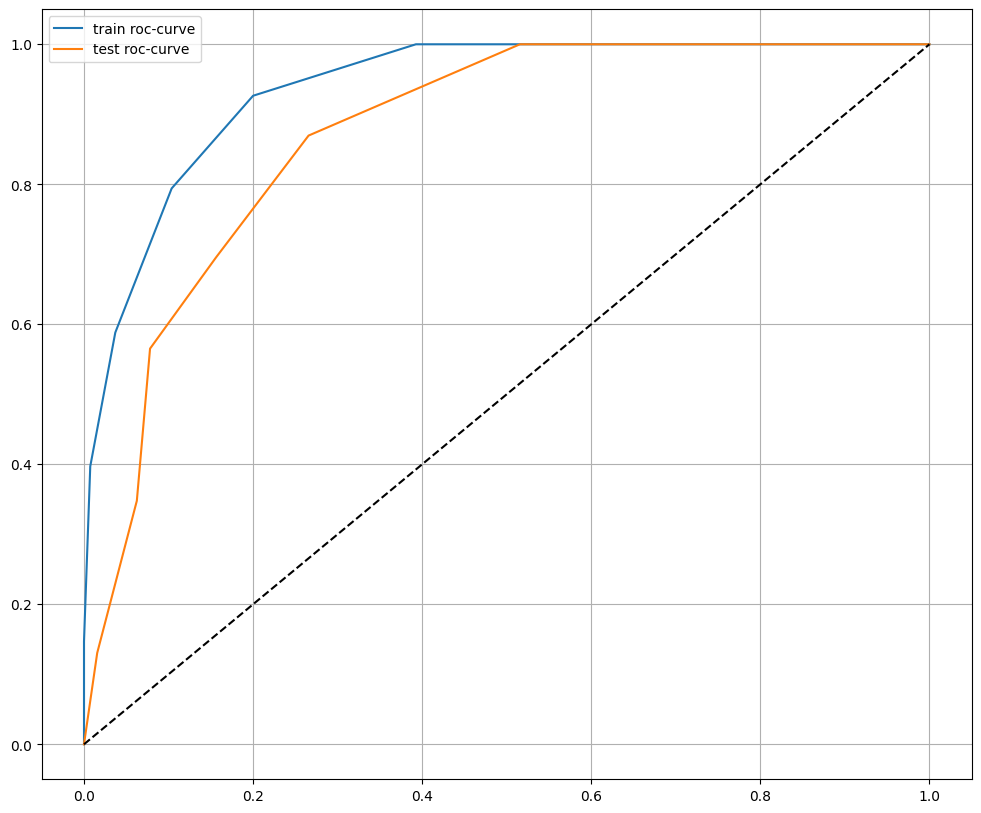

In [29]:
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(x_train_scaled, y_train)
knn_prediction = knn_model.predict_proba(x_test_scaled)[:, 1]

auc_knn = roc_auc_score(y_test, knn_prediction)
mse_knn = mean_squared_error(y_test, knn_prediction)
rmse_knn = np.sqrt(mean_squared_error(y_test,knn_prediction ))
mae_knn = mean_absolute_error(y_test,knn_prediction )
r2_knn = r2_score(y_test,knn_prediction )
acc_knn = accuracy_score(y_test,(knn_model.predict(x_test_scaled)))
plot_roc_curve(knn_model, x_train_scaled, x_test_scaled, y_train, y_test)

**Gradient Boosting Classifier**

Train roc-auc: 0.9895969498910676
Test roc-auc: 0.90625


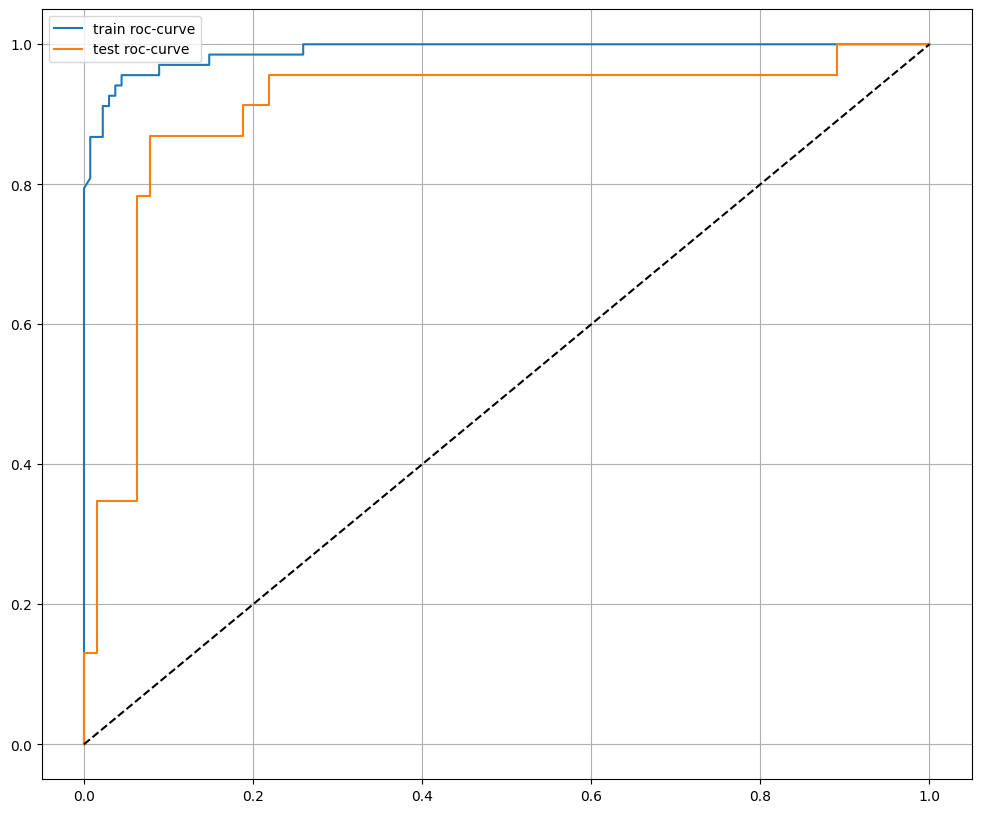

In [30]:
gradientboost_clf = GradientBoostingClassifier(max_depth=2, random_state=1)
gradientboost_clf.fit(x_train_scaled,y_train)
gradientboost_prediction = gradientboost_clf.predict_proba(x_test_scaled)[:, 1]

auc_gradientboost = roc_auc_score(y_test, gradientboost_prediction)
mse_gradientboost = mean_squared_error(y_test, gradientboost_prediction)
rmse_gradientboost = np.sqrt(mean_squared_error(y_test,gradientboost_prediction))
mae_gradientboost = mean_absolute_error(y_test,gradientboost_prediction )
r2_gradientboost = r2_score(y_test,gradientboost_prediction )
acc_gradientboos = accuracy_score(y_test,(gradientboost_clf.predict(x_test_scaled)))
plot_roc_curve(gradientboost_clf, x_train_scaled, x_test_scaled, y_train, y_test)

**Decison Tree Classifier**

Train roc-auc: 0.8913398692810458
Test roc-auc: 0.8549592391304348


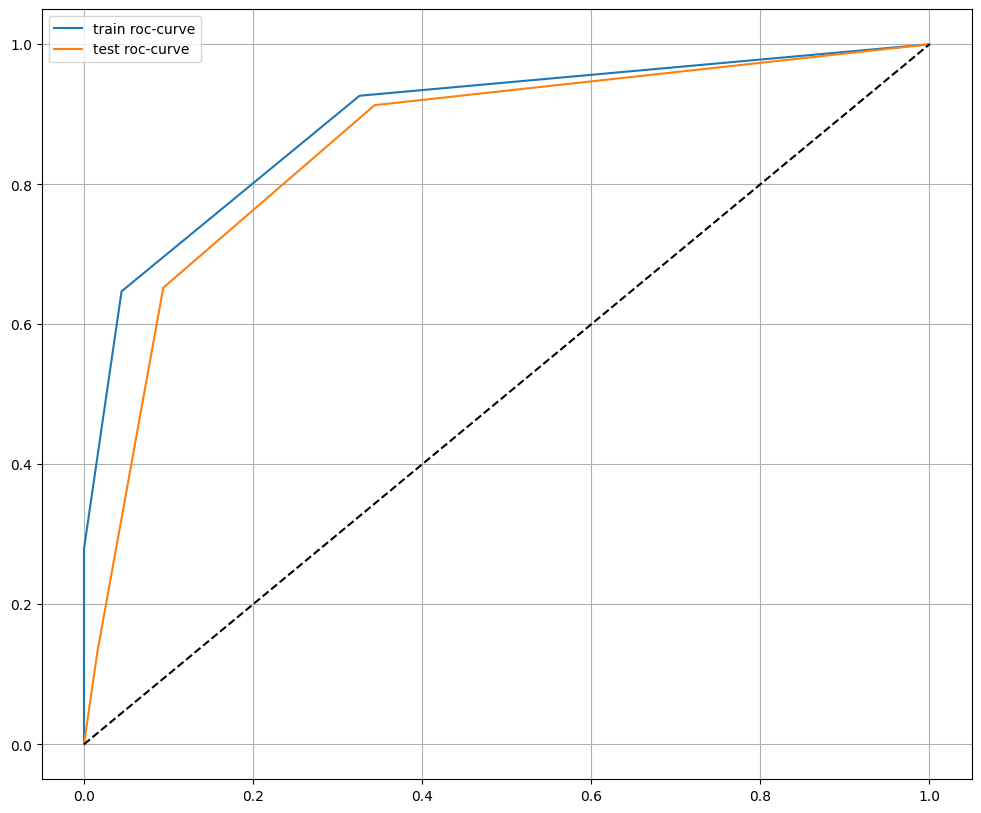

In [31]:
dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=2)
dt_model.fit(x_train_scaled, y_train)
dt_prediction = dt_model.predict_proba(x_test_scaled)[:, 1]

auc_dt = roc_auc_score(y_test, dt_prediction)
mse_dt = mean_squared_error(y_test, dt_prediction)
rmse_dt = np.sqrt(mean_squared_error(y_test,dt_prediction))
mae_dt = mean_absolute_error(y_test,dt_prediction)
r2_dt = r2_score(y_test,dt_prediction)
acc_dt = accuracy_score(y_test,(dt_model.predict(x_test_scaled)))
plot_roc_curve(dt_model, x_train_scaled, x_test_scaled, y_train, y_test)

# Нейросеть

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_auc_score, accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN

In [33]:
model = Sequential()
model.add(Embedding(300, 64, input_length=5))
model.add(SimpleRNN  (32, return_sequences=True))
model.add(SimpleRNN  (16, return_sequences=True))
model.add(SimpleRNN  (8))
model.add(Dense(1, activation='tanh'))
model.compile(loss="mse", optimizer="adam", metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
7/7 [==============================] - 12s 173ms/step - loss: 0.3633 - accuracy: 0.5567 - val_loss: 0.2328 - val_accuracy: 0.6437
Epoch 2/100
7/7 [==============================] - 0s 41ms/step - loss: 0.1806 - accuracy: 0.7389 - val_loss: 0.2248 - val_accuracy: 0.7471
Epoch 3/100
7/7 [==============================] - 0s 25ms/step - loss: 0.1260 - accuracy: 0.8424 - val_loss: 0.1771 - val_accuracy: 0.7586
Epoch 4/100
7/7 [==============================] - 0s 23ms/step - loss: 0.1023 - accuracy: 0.8768 - val_loss: 0.1671 - val_accuracy: 0.7471
Epoch 5/100
7/7 [==============================] - 0s 22ms/step - loss: 0.0892 - accuracy: 0.9015 - val_loss: 0.1675 - val_accuracy: 0.7471
Epoch 6/100
7/7 [==============================] - 0s 22ms/step - loss: 0.0741 - accuracy: 0.9360 - val_loss: 0.1667 - val_accuracy: 0.7356
Epoch 7/100
7/7 [==============================] - 0s 25ms/step - loss: 0.0671 - accuracy: 0.9507 - val_loss: 0.1700 - val_accuracy: 0.7816
Epoch 8/100
7/7 [=

In [34]:
ypred = model.predict(x_test)

auc_nn = str(roc_auc_score(y_test, ypred))
mse_nn = str(mean_squared_error(y_test, ypred))
rmse_nn = str(np.sqrt(mean_squared_error(y_test, ypred)))
mae_nn = str(mean_absolute_error(y_test, ypred))
r2_nn = str(r2_score(y_test, ypred))
score = model.evaluate(x_test, y_test, batch_size=32, verbose=1)
acc_nn = (score[1])

3/3 [==============================] - 0s 6ms/step - loss: 0.2613 - accuracy: 0.7241


# Результаты

In [35]:
from tabulate import tabulate
value_list = [
              ["Logistic Regression", auc_lr, mse_lr, rmse_lr,mae_lr, r2_lr, acc_lr],
              ["Naive Bayes", auc_nb, mse_nb, rmse_nb, mae_nb, r2_nb, acc_nb],
              ["Random Forest",auc_rf, mse_rf, rmse_rf,mae_rf, r2_rf, acc_rf],
              ["K-Nearest Neighbors", auc_knn, mse_knn, rmse_knn, mae_knn, r2_knn, acc_knn],
              ["Gradient Boosting", auc_gradientboost, mse_gradientboost, rmse_gradientboost, mae_gradientboost, r2_gradientboost, acc_gradientboos],
              ["Decision Tree", auc_dt, mse_dt, rmse_dt, mae_dt, r2_dt, acc_dt],
              ["Simple RNN", auc_nn, mse_nn, rmse_nn, mae_nn, r2_nn, acc_nn]
            ]
column_list = ["Method", "ROC-AUC","MSE", "RMSE","MAE", "R^2", "Accuracy"]
print(tabulate(value_list,column_list,tablefmt='grid'))

+---------------------+-----------+-----------+----------+----------+-----------+------------+
| Method              |   ROC-AUC |       MSE |     RMSE |      MAE |       R^2 |   Accuracy |
+=====================+===========+===========+==========+==========+===========+============+
| Logistic Regression |  0.879755 | 0.122883  | 0.350547 | 0.238229 |  0.368135 |   0.862069 |
+---------------------+-----------+-----------+----------+----------+-----------+------------+
| Naive Bayes         |  0.889946 | 0.121544  | 0.348631 | 0.220889 |  0.375025 |   0.83908  |
+---------------------+-----------+-----------+----------+----------+-----------+------------+
| Random Forest       |  0.900815 | 0.103971  | 0.322446 | 0.215747 |  0.465381 |   0.896552 |
+---------------------+-----------+-----------+----------+----------+-----------+------------+
| K-Nearest Neighbors |  0.872283 | 0.129949  | 0.360484 | 0.239464 |  0.331805 |   0.827586 |
+---------------------+-----------+-----------+---


Из полученных результатов мы можем сделать следующие выводы:

*   Самым точным оказались  Random Forest и Gradient Boosting, самым неточным Simple RNN.Это можно наблюдать из графиков ROC-AUС, а также по значениям из таблицы(ROC-AUC и Accuracy)
*   Также судя по значениям функций ошибок (MSE,MAE,RMSE) точным методом считается Gradient Boosting, а самым неточным остается Simple RNN.
*   Если обратить внимание на метрику R^2, то также самой точной будет Gradient Boosting, однако качество модели меньше 50%, а  SimpleRNN  меньше 1%.






